## Probabilistic Approach

In [71]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import datasets
from scipy.stats import norm
from scipy.integrate import simpson

In [5]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)

In [7]:
params = {
    'legend.fontsize': 'small',
    'figure.figsize': (15,5),
    'axes.labelsize': 'medium',
    'axes.titlesize': 'large',
    'xtick.labelsize': 'medium',
    'ytick.labelsize': 'medium',
    'savefig.dpi': 75,
    'image.interpolation': 'none',
    'savefig.bbox': 'tight',
    'lines.linewidth': 1,
    'legend.numpoints': 1,
}

CMAP = plt.cm.rainbow
plt.rcParams.update(params)
plt.set_cmap(CMAP)

<Figure size 1500x500 with 0 Axes>

### Dataset

In [9]:
X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape

((150, 4), (150,))

In [11]:
type(X)

numpy.ndarray

In [16]:
cols = ['sepal length', 'sepal width', 'petal length', 'petal width']
iris_df = pd.DataFrame(X, columns=cols)

In [18]:
iris_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


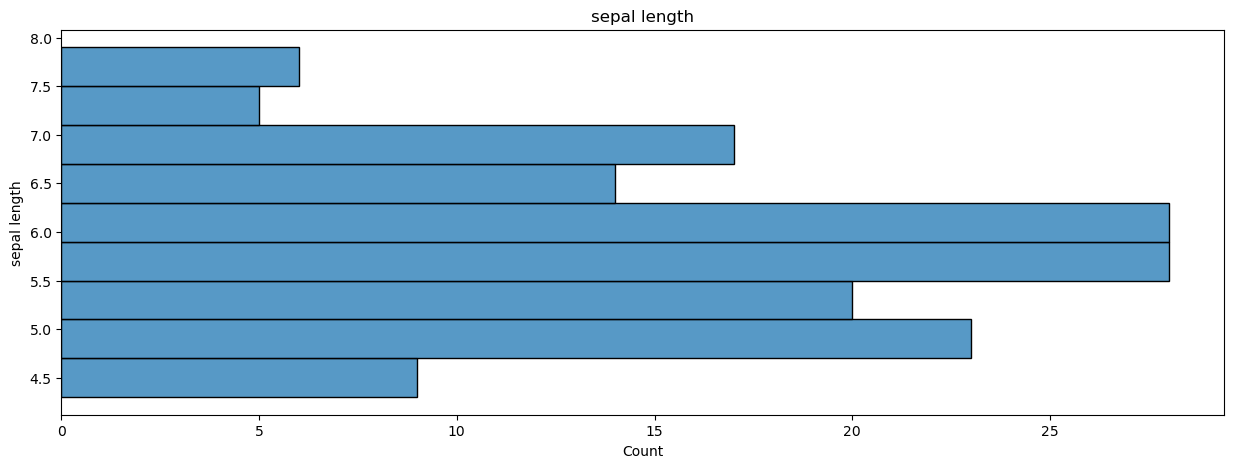

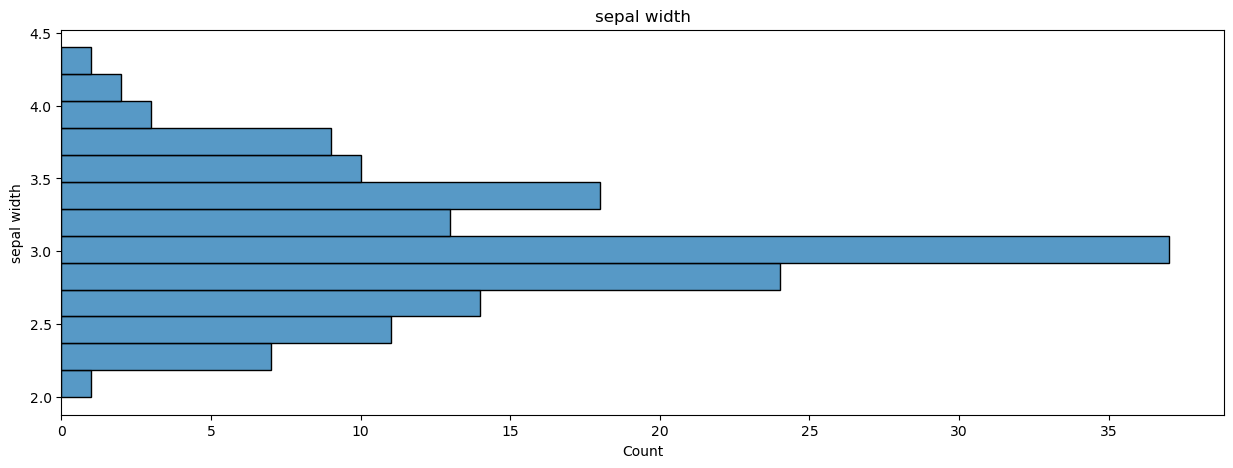

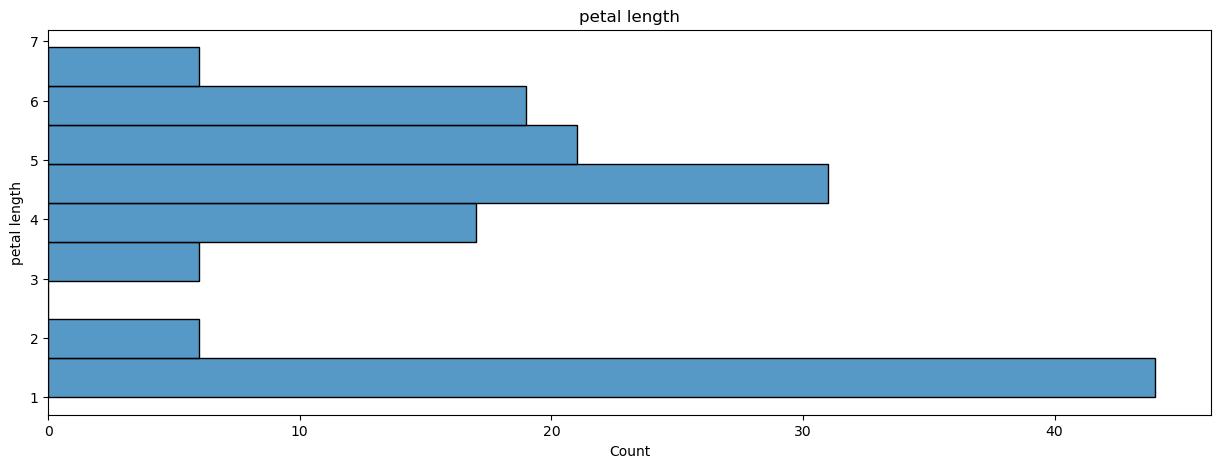

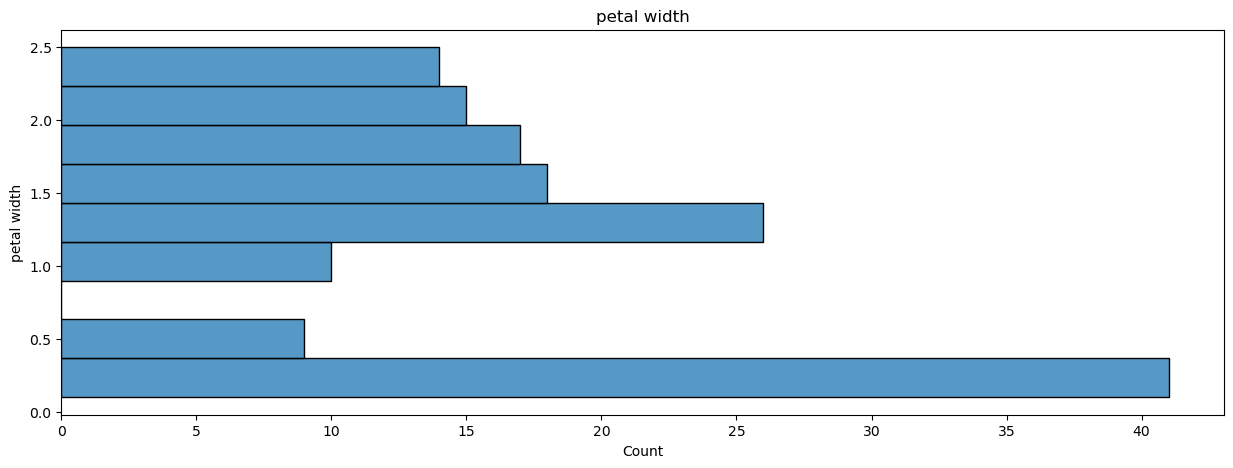

In [22]:
for col in cols:
    fig, ax = plt.subplots()
    colcount = iris_df[col].value_counts()
    ax.set_title(col)
    sns.histplot(data=iris_df,y=col, ax=ax)

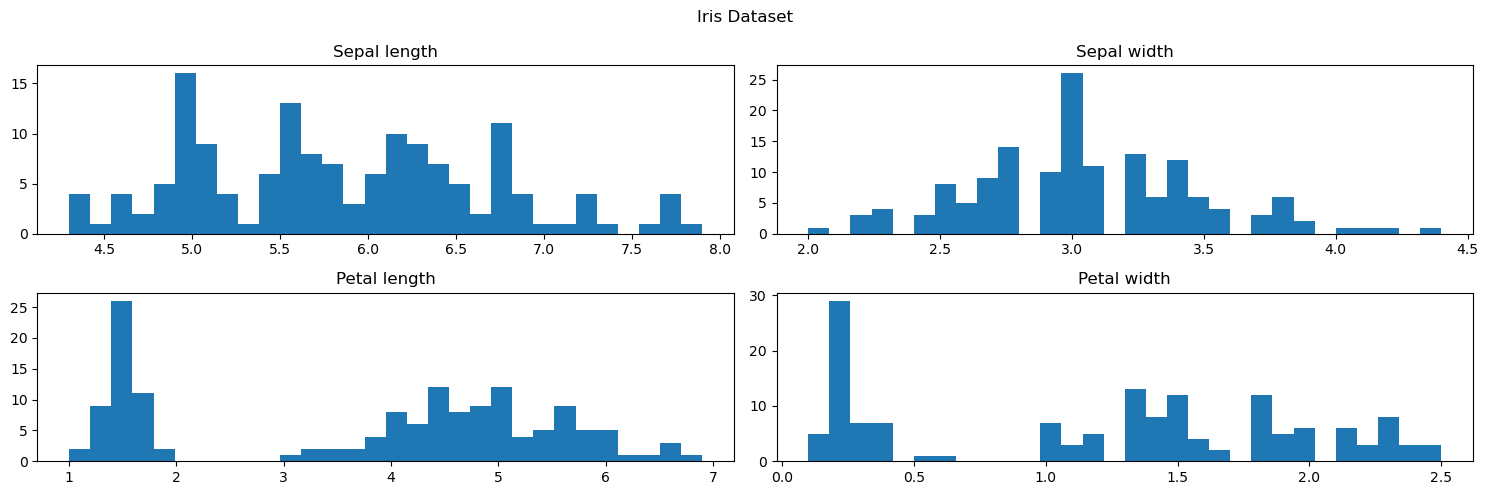

In [40]:
fig = plt.figure()

fig.suptitle('Iris Dataset')

for count, col in enumerate(iris_df.columns):
    ax = fig.add_subplot(2,2, count+1)
    n, bins, patch = ax.hist(iris_df[col], bins=30)
    ax.set_title(col.capitalize())

plt.tight_layout()

## Gaussian Distribution

In [43]:
# Mean, std

def fn_mu_std(df):
    
    mu, std, min, max = {}, {}, {}, {}
    
    for col in df.columns:
        mu[col] = df[col].mean()
        std[col] = df[col].std()
        min[col] = df[col].min()
        max[col] = df[col].max()
        
    return mu, std, min, max

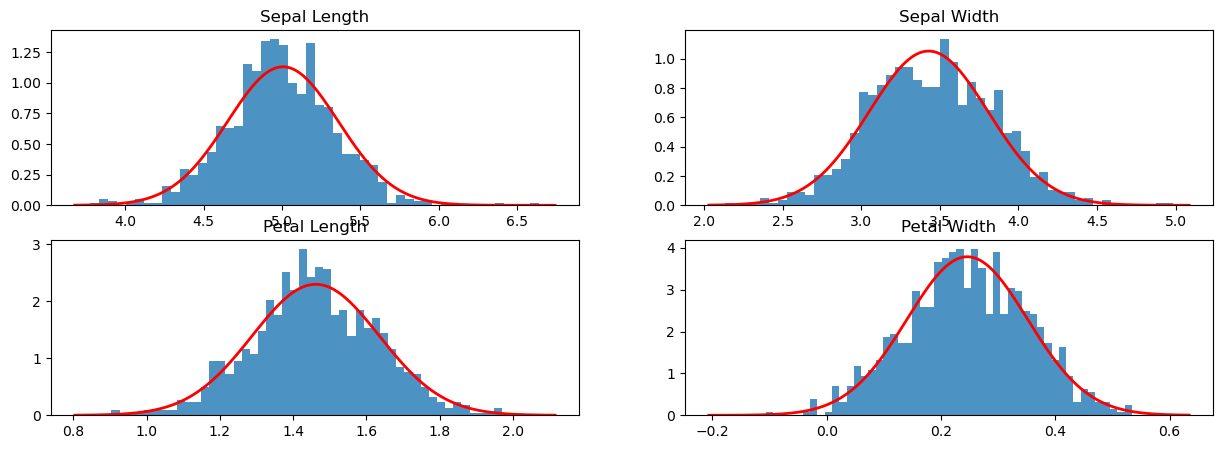

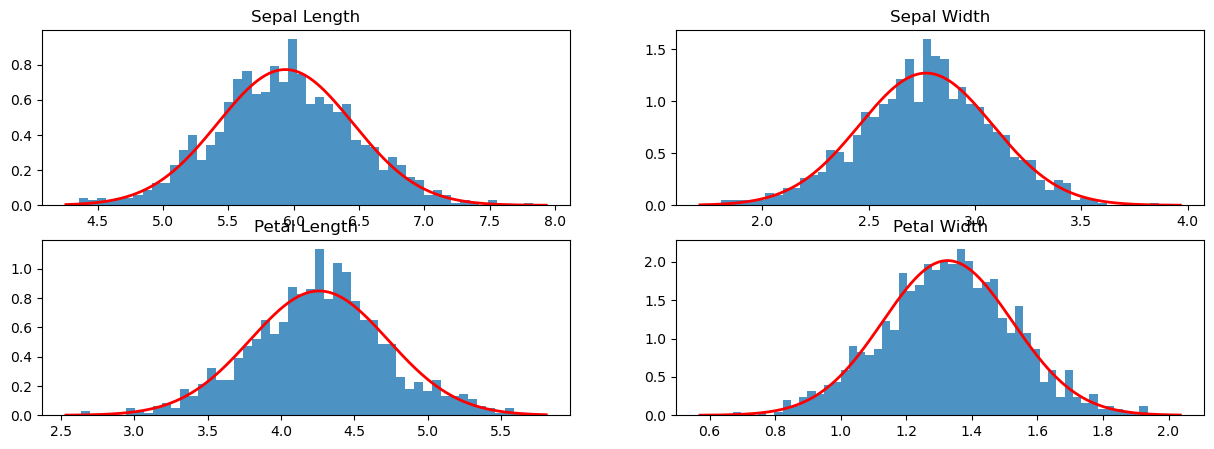

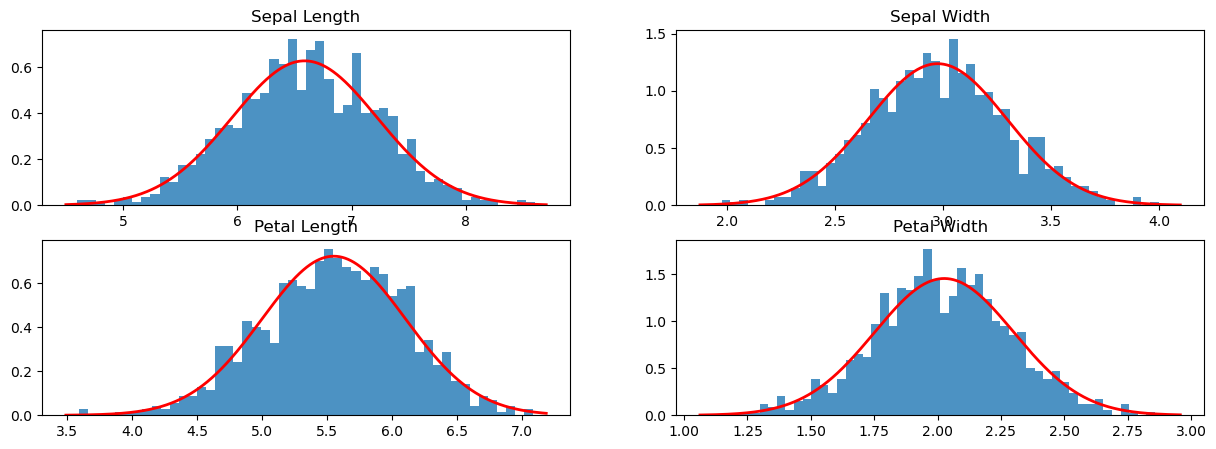

In [75]:
pdf_label = {}

for lbl in [0,1,2]:
    tmp_df = iris_df[y==lbl]
    mu, std_dev, min_val, max_val = fn_mu_std(tmp_df)
    
    fig, axes = plt.subplots(2,2)
    axes = axes.ravel()
    nSample=1000
    pdf_col = {}
    for count, col in enumerate(tmp_df.columns):
        ax= axes[count]
        meanVal = mu[col]
        stdDev = std_dev[col]
        minVal = min_val[col]
        maxVal = max_val[col]
        data = np.random.normal(meanVal, stdDev, nSample)
        ax.hist(data, bins=50, density=True,alpha=0.8)
        # ax.hist(iris_df[col], bins=50, alpha=0.4)
        x = np.linspace(data.min()-0.1, data.max()+0.1, nSample)
        pdf = norm.pdf(x, meanVal, stdDev)
        ax.plot(x, pdf, 'r-', lw=2)
        ax.set_title(col.title())